In [2]:
import tensorflow as tf 
import numpy as np
import os
from keras.layers import Conv2D, Activation, AveragePooling2D, MaxPooling2D, ZeroPadding2D, Input, concatenate
from keras.layers.core import Lambda, Dense, Flatten
from numpy import genfromtxt
import cv2
from tensorflow.keras.layers import BatchNormalization
from keras import backend as K
from keras.layers import *
from keras.models import Model
from sklearn.preprocessing import normalize
K.set_image_data_format('channels_first')
import random
import matplotlib.pyplot as plt
import keras
from keras.utils import plot_model
import sys
from zipfile import ZipFile

In [3]:
def inception_block_1a(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_3a_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(128,(3,3),data_format='channels_first',name='inception_3a_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(16,(1,1),data_format='channels_first',name='inception_3a_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(32,(5,5),data_format='channels_first',name='inception_3a_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_pool = MaxPooling2D(pool_size=3, strides=2, data_format='channels_first')(X)
    X_pool = Conv2D(32, (1, 1), data_format='channels_first', name='inception_3a_pool_conv')(X_pool)
    X_pool = BatchNormalization(axis=1, epsilon=0.00001, name='inception_3a_pool_bn')(X_pool)
    X_pool = Activation('relu')(X_pool)
    X_pool = ZeroPadding2D(padding=((3, 4), (3, 4)), data_format='channels_first')(X_pool)
    
    X_1=Conv2D(64,(1,1),data_format='channels_first',name='inception_3a_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_5,X_pool,X_1],axis=1)
    return inception

def inception_block_1b(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_3b_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(128,(3,3),data_format='channels_first',name='inception_3b_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(32,(1,1),data_format='channels_first',name='inception_3b_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(64,(5,5),data_format='channels_first',name='inception_3b_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_P=AveragePooling2D(pool_size=(3,3),strides=(3,3),data_format='channels_first')(X)
    X_P=Conv2D(64,(1,1),data_format='channels_first',name='inception_3b_pool_conv')(X_P)
    X_P=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_pool_bn')(X_P)
    X_P=Activation('relu')(X_P)
    X_P=ZeroPadding2D(padding=(4,4),data_format='channels_first')(X_P)
    
    X_1=Conv2D(64,(1,1),data_format='channels_first',name='inception_3b_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_5,X_P,X_1],axis=1)
    return inception

def inception_block_1c(X):
    X_3=Conv2D(128,(1,1),data_format='channels_first',name='inception_3c_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3c_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(256,(3,3),strides=(2,2),data_format='channels_first',name='inception_3c_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3c_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(32,(1,1),data_format='channels_first',name='inception_3c_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3c_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(64,(5,5),strides=(2,2),data_format='channels_first',name='inception_3c_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3c_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_P=MaxPooling2D(pool_size=3,strides=2,data_format='channels_first')(X)
    X_P=ZeroPadding2D(padding=((0,1),(0,1)),data_format='channels_first')(X_P)
    

    inception=concatenate([X_3,X_5,X_P],axis=1)
    return inception

def inception_block_2a(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_4a_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(192,(3,3),data_format='channels_first',name='inception_4a_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(32,(1,1),data_format='channels_first',name='inception_4a_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(64,(5,5),data_format='channels_first',name='inception_4a_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_P=AveragePooling2D(pool_size=(3,3),strides=(3,3),data_format='channels_first')(X)
    X_P=Conv2D(128,(1,1),data_format='channels_first',name='inception_4a_pool_conv')(X_P)
    X_P=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_pool_bn')(X_P)
    X_P=Activation('relu')(X_P)
    X_P=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_P)
    
    X_1=Conv2D(256,(1,1),data_format='channels_first',name='inception_4a_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_5,X_P,X_1],axis=1)
    return inception

def inception_block_2b(X):
    X_3=Conv2D(160,(1,1),data_format='channels_first',name='inception_4e_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4e_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(256,(3,3),strides=(2,2),data_format='channels_first',name='inception_4e_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4e_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(64,(1,1),data_format='channels_first',name='inception_4e_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4e_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(128,(5,5),strides=(2,2),data_format='channels_first',name='inception_4e_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4e_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_P=MaxPooling2D(pool_size=3,strides=2,data_format='channels_first')(X)
    X_P=ZeroPadding2D(padding=((0,1),(0,1)),data_format='channels_first')(X_P)

    inception=concatenate([X_3,X_5,X_P],axis=1)
    return inception

def inception_block_3a(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_5a_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5a_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(384,(3,3),data_format='channels_first',name='inception_5a_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5a_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)

    
    X_P=AveragePooling2D(pool_size=(3,3),strides=(3,3),data_format='channels_first')(X)
    X_P=Conv2D(96,(1,1),data_format='channels_first',name='inception_5a_pool_conv')(X_P)
    X_P=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5a_pool_bn')(X_P)
    X_P=Activation('relu')(X_P)
    X_P=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_P)
    
    X_1=Conv2D(256,(1,1),data_format='channels_first',name='inception_5a_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5a_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_P,X_1],axis=1)
    return inception
def inception_block_3b(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_5b_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5b_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(384,(3,3),data_format='channels_first',name='inception_5b_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5b_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    
    X_P=MaxPooling2D(pool_size=(3,3),strides=2,data_format='channels_first')(X)
    X_P=Conv2D(96,(1,1),data_format='channels_first',name='inception_5b_pool_conv')(X_P)
    X_P=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5b_pool_bn')(X_P)
    X_P=Activation('relu')(X_P)
    X_P=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_P)
    
    X_1=Conv2D(256,(1,1),data_format='channels_first',name='inception_5b_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5b_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_P,X_1],axis=1)
    return inception


def FinalModel(input_shape):
    
    X_input=Input(input_shape)
    
    X=ZeroPadding2D(padding=(3,3))(X_input)
    X=Conv2D(64,(7,7),strides=(2,2),name='conv1')(X)
    X=BatchNormalization(axis=1,name='bn1')(X)
    X=Activation('relu')(X)
    
    X=ZeroPadding2D((1,1))(X)
    X=MaxPooling2D((3,3),strides=2)(X)
    
    X=Conv2D(64,(1,1),strides=(1,1),name='conv2')(X)
    X=BatchNormalization(axis=1,epsilon=0.00001,name='bn2')(X)
    X=Activation('relu')(X) 
    
    X=ZeroPadding2D(padding=(1,1))(X)
    
    X=Conv2D(192,(3,3),strides=(1,1),name='conv3')(X)
    X=BatchNormalization(axis=1,epsilon=0.00001,name='bn3')(X)
    X=Activation('relu')(X)
    
    X=ZeroPadding2D(padding=(1,1))(X)
    X=MaxPooling2D(pool_size=(3,3),strides=(2,2))(X)
    
    X=inception_block_1a(X)
    X=inception_block_1b(X)
    X=inception_block_1c(X)
    
    X=inception_block_2a(X)
    X=inception_block_2b(X)
    
    X=inception_block_3a(X)
    X=inception_block_3b(X)
    
    X=AveragePooling2D(pool_size=(3,3),strides=(1,1),data_format='channels_first')(X)
    X=Flatten()(X)
    X=Dense(128,activation='relu',kernel_initializer='glorot_normal',name='dense_layer')(X)
    X=Lambda(lambda x:K.l2_normalize(x,axis=1),name='lambda_1')(X)
    
    model=Model(inputs=X_input,outputs=X,name='FaceRecognotionModel')
    return model    

In [4]:
model=FinalModel(input_shape=(3,96,96))

In [ ]:
model.summary()

In [5]:
# The triplet loss function compares a baseline input to positive input and a negative input in machine learning algorithms. 
# The distance between the baseline input and the positive input is reduced to a minimum, 
# while the distance between the baseline input and the negative input is increased.

def triplet_loss_t(y_true,y_pred):

    anchor=y_pred[:,0:128]
    pos=y_pred[:,128:256]
    neg=y_pred[:,256:384]
    
    positive_distance = K.sum(K.abs(anchor-pos), axis=1)
    negative_distance = K.sum(K.abs(anchor-neg), axis=1)
    probs=K.softmax([positive_distance,negative_distance],axis=0)
    loss=K.mean(K.abs(probs[0])+K.abs(1.0-probs[1]))

    return loss

In [6]:
def resize(path_image,path_haar='/content/drive/MyDrive/ComputerVision/haarcascade_frontalface_default.xml'):
    # read image
    image=cv2.imread(path_image)
    # getting embedding matrix of the given image
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # to to extract faces from the images we used OpenCV’s pre-trained Haar Cascade classifiers
    classifier=cv2.CascadeClassifier(path_haar)
    faces=classifier.detectMultiScale(gray,1.1,6)
    # skip if no face was detected
    if len(faces) != 1:
        return -1
    # crop image to 96*96 size for model
    x,y,w,h=faces.squeeze()
    crop=image[y:y+h,x:x+w]
    image=cv2.resize(crop,(96,96))
    image=np.transpose(image,(2,0,1))
    image=image.astype('float32')/255.0

    return image

In [7]:
def data_gen(batch_size=32):
    while True:
        i=0
        positive=[]
        anchor=[]
        negative=[]    
        
        # find 2 class and define anchor, positive and negative images
        while(i < batch_size):
            paath = os.listdir(PATH)
            r=random.sample(paath,2)
            
            pos_dir=PATH+'/'+ r[0]
            neg_dir=PATH+'/'+ r[1]

            a=random.sample(os.listdir(pos_dir),2)

            pos=pos_dir+'/'+ a[0]
            #print(pos)
            anc=pos_dir+'/'+ a[1]
            #print(anc)
            neg=neg_dir+'/'+random.choice(os.listdir(neg_dir))
            #print(neg)
            pos_img=resize(pos,path_haar)
            
            if pos_img is -1:
                continue
            neg_img=resize(neg,path_haar)
            if neg_img is -1:
                continue
            anc_img=resize(anc,path_haar)
            if anc_img is -1:
                continue
            positive.append(list(pos_img))
                
            negative.append(list(neg_img))
                
            anchor.append(list(anc_img))
                
            i=i+1
        #return anchor,positive,negative
        yield ([np.array(anchor),np.array(positive),np.array(negative)],np.zeros((batch_size,1)).astype("float32"))

<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-7-328296502138>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if pos_img is -1:
<ipython-input-7-328296502138>:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if neg_img is -1:
<ipython-input-7-328296502138>:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if anc_img is -1:


In [8]:
triplet_model_a=Input((3,96,96))
triplet_model_n=Input((3,96,96))
triplet_model_p=Input((3,96,96))
triplet_model_out=Concatenate()([model(triplet_model_a),model(triplet_model_p),model(triplet_model_n)])
triplet_model=Model([triplet_model_a,triplet_model_p,triplet_model_n],triplet_model_out)

In [9]:
triplet_model.compile(optimizer='adam',loss=triplet_loss_t)

In [10]:
path_haar='/content/drive/MyDrive/ComputerVision/haarcascade_frontalface_default.xml'
PATH='/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder'

In [ ]:
triplet_model.fit(data_gen(),steps_per_epoch=100,epochs=5)

In [ ]:
triplet_model.fit(data_gen(),steps_per_epoch=100,epochs=1)

100/100 [==============================] - 653s 7s/step - loss: 0.0055


In [ ]:
#triplet_model.save('/content/drive/MyDrive/ComputerVision/triplet_modelfinal2.h5')

In [11]:
triplet_model=keras.models.load_model('/content/drive/MyDrive/ComputerVision/triplet_modelfinal2.h5',custom_objects={'triplet_loss_t':triplet_loss_t})

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
# using haar cascade to detect the face and crops the face to remove the unwanted noise from the image
# and then resize it to (96,96).

def image_resizing(image,path_haar):

    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    classifier=cv2.CascadeClassifier(path_haar)
    faces=classifier.detectMultiScale(gray,1.1,6)

    if len(faces)!=1:
        #print('More than one Image in the pic')
        # sys.exit(0)
        return NULL
        
    x,y,w,h=faces.squeeze()
    crop=image[y:y+h,x:x+w]
    image=cv2.resize(crop,(96,96))

    return image

In [13]:
# predict embedding
# normalizing the image matrix and transpose it since here we are using the 'Channels First' data format. 
# Then it uses the model to predict the embedding for the provided image
def encode_img(img1,triplet_model):

    img=img1[...,::-1]
    #print(1)
    img=np.around(np.transpose(img,(2,0,1))/255,decimals=12)
    #print(2)
    x_train=np.array([img])
    #print(3)
    emb=triplet_model.layers[3].predict_on_batch(x_train)

    return emb

In [14]:
# calculate the distance between the embeddings and confidence score

threshold=0.4
interval=0.15
def confidence_value(ref_encode,img_encode,thres=threshold):
    
    dist=np.linalg.norm((img_encode-ref_encode))
    confidence=(threshold-max([dist,interval]))/(threshold-interval)
    return dist,confidence

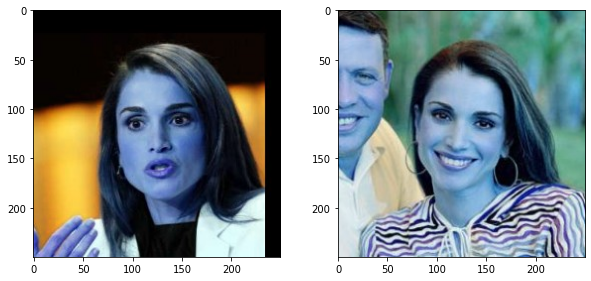

In [15]:
rimage=cv2.imread('/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder/Queen_Rania/Queen_Rania_0003.jpg')
image=cv2.imread('/content/drive/MyDrive/ComputerVision/TestFinall/TestFolder/Queen_Rania_0002.jpg')

fig=plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(rimage)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(image)

In [16]:
rimage=cv2.imread('/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder/Queen_Rania/Queen_Rania_0003.jpg')
image=cv2.imread('/content/drive/MyDrive/ComputerVision/TestImages/TestFolder/Queen_Rania_0002.jpg')


rimg=image_resizing(rimage,path_haar)
img=image_resizing(image,path_haar)
r_encode=encode_img(rimg,triplet_model)
img_encode=encode_img(img,triplet_model)
dist,conf=confidence_value(r_encode,img_encode)
if dist<threshold:
    print(dist)
    print("Match with a confidence of ",conf*100)
else:
    print("No Match with a confidence of ",abs(conf*100))

0.1041177
Match with a confidence of  100.0


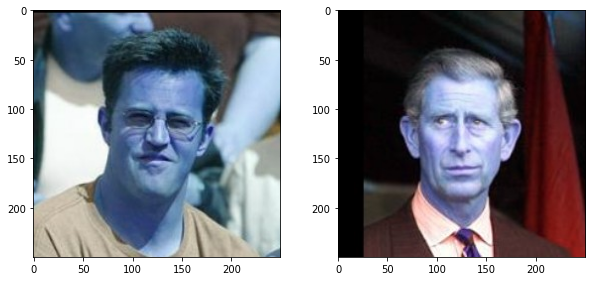

In [ ]:
rimage=cv2.imread('/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder/Matthew_Perry/Matthew_Perry_0005.jpg')
image=cv2.imread('/content/drive/MyDrive/ComputerVision/TestFinall/TestFolder/Prince_Charles_0001.jpg')

fig=plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(rimage)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(image)

In [ ]:
rimage=cv2.imread('/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder/Matthew_Perry/Matthew_Perry_0005.jpg')
image=cv2.imread('/content/drive/MyDrive/ComputerVision/TestFinall/TestFolder/Prince_Charles_0001.jpg')

rimg=image_resizing(rimage,path_haar)
img=image_resizing(image,path_haar)
r_encode=encode_img(rimg,triplet_model)
img_encode=encode_img(img,triplet_model)
dist,conf=confidence_value(r_encode,img_encode)
if dist<threshold:
    print(dist)
    print("Match with a confidence of ",conf*100)
else:
    print("No Match with a confidence of ",abs(conf*100))

No Match with a confidence of  17.067637443542473


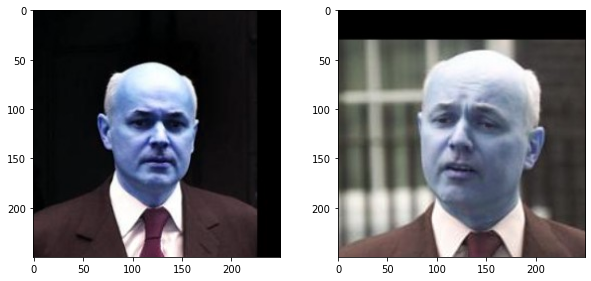

In [ ]:
rimage=cv2.imread('/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder/Iain_Duncan_Smith/Iain_Duncan_Smith_0002.jpg')
image=cv2.imread('/content/drive/MyDrive/ComputerVision/TestImages/TestFolder/Iain_Duncan_Smith_0004.jpg')

fig=plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(rimage)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(image)

In [ ]:
rimage=cv2.imread('/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder/Iain_Duncan_Smith/Iain_Duncan_Smith_0002.jpg')
image=cv2.imread('/content/drive/MyDrive/ComputerVision/TestImages/TestFolder/Iain_Duncan_Smith_0004.jpg')

rimg=image_resizing(rimage,path_haar)
img=image_resizing(image,path_haar)
r_encode=encode_img(rimg,triplet_model)
img_encode=encode_img(img,triplet_model)
dist,conf=confidence_value(r_encode,img_encode)
if dist<threshold:
    print(dist)
    print("Match with a confidence of ",conf*100)
else:
    print("No Match with a confidence of ",abs(conf*100))

0.17952679
Match with a confidence of  88.18928360939027


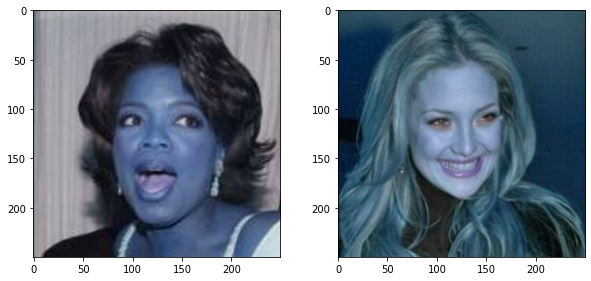

In [ ]:
rimage=cv2.imread('/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder/Oprah_Winfrey/Oprah_Winfrey_0002.jpg')
image=cv2.imread('/content/drive/MyDrive/ComputerVision/TestImages/TestFolder/Kate_Hudson_0001.jpg')

fig=plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(rimage)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(image)

In [ ]:
rimage=cv2.imread('/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder/Oprah_Winfrey/Oprah_Winfrey_0002.jpg')
image=cv2.imread('/content/drive/MyDrive/ComputerVision/TestImages/TestFolder/Kate_Hudson_0001.jpg')

rimg=image_resizing(rimage,path_haar)
img=image_resizing(image,path_haar)
r_encode=encode_img(rimg,triplet_model)
img_encode=encode_img(img,triplet_model)
dist,conf=confidence_value(r_encode,img_encode)
if dist<threshold:
    print(dist)
    print("Match with a confidence of ",conf*100)
else:
    print("No Match with a confidence of ",abs(conf*100))

No Match with a confidence of  44.09660339355468


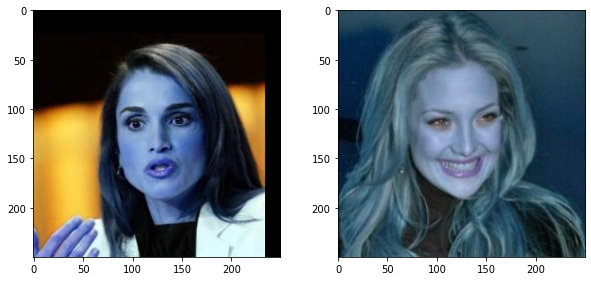

In [ ]:
rimage=cv2.imread('/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder/Queen_Rania/Queen_Rania_0003.jpg')
image=cv2.imread('/content/drive/MyDrive/ComputerVision/TestImages/TestFolder/Kate_Hudson_0001.jpg')

fig=plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(rimage)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(image)

In [ ]:
rimage=cv2.imread('/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder/Queen_Rania/Queen_Rania_0003.jpg')
image=cv2.imread('/content/drive/MyDrive/ComputerVision/TestImages/TestFolder/Kate_Hudson_0001.jpg')

rimg=image_resizing(rimage,path_haar)
img=image_resizing(image,path_haar)
r_encode=encode_img(rimg,triplet_model)
img_encode=encode_img(img,triplet_model)
dist,conf=confidence_value(r_encode,img_encode)
if dist<threshold:
    print(dist)
    print("Match with a confidence of ",conf*100)
else:
    print("No Match with a confidence of ",abs(conf*100))

No Match with a confidence of  36.39898538589477


In [42]:
from zmq.constants import NULL
pathtest = '/content/drive/MyDrive/ComputerVision/TestImages/TestFolder'
pathtrain = '/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder'
names = os.listdir(pathtest)
labels = []
results =[]
for i in names:
  pathfiletest = pathtest + '/'+ i
  label = str(i)[:-9]
  pathfiletrain = pathtrain + '/' + label
  if pathfiletrain == '/content/drive/MyDrive/ComputerVision/TrainFinal/TrainFolder/.ipynb_ch':
    continue
  randpic=random.sample(os.listdir(pathfiletrain),1)
  pathfiletrain2 = pathfiletrain + '/' + randpic[0]
  
  rimage=cv2.imread(pathfiletrain2)
  image=cv2.imread(pathfiletest)

  rimg=image_resizing(rimage,path_haar) 
  img=image_resizing(image,path_haar)
  if rimg is NULL or img is NULL:
    continue
  r_encode=encode_img(rimg,triplet_model)
  img_encode=encode_img(img,triplet_model)
  dist,conf=confidence_value(r_encode,img_encode)
  if dist<threshold:
      
      results.append(1)
  else:
      
      results.append(0)

nparr = np.array(results)
acc = np.sum(nparr) / nparr.size
acc

0.9523809523809523